# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt

# Загрузим данные из файла в датафрейм
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
    
# Для удобства отобразим все колонки
pd.set_option('display.max_columns', None)
    
# Проверим результат, выведем первые 10 строк датафрейма
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
# Выведем общую информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

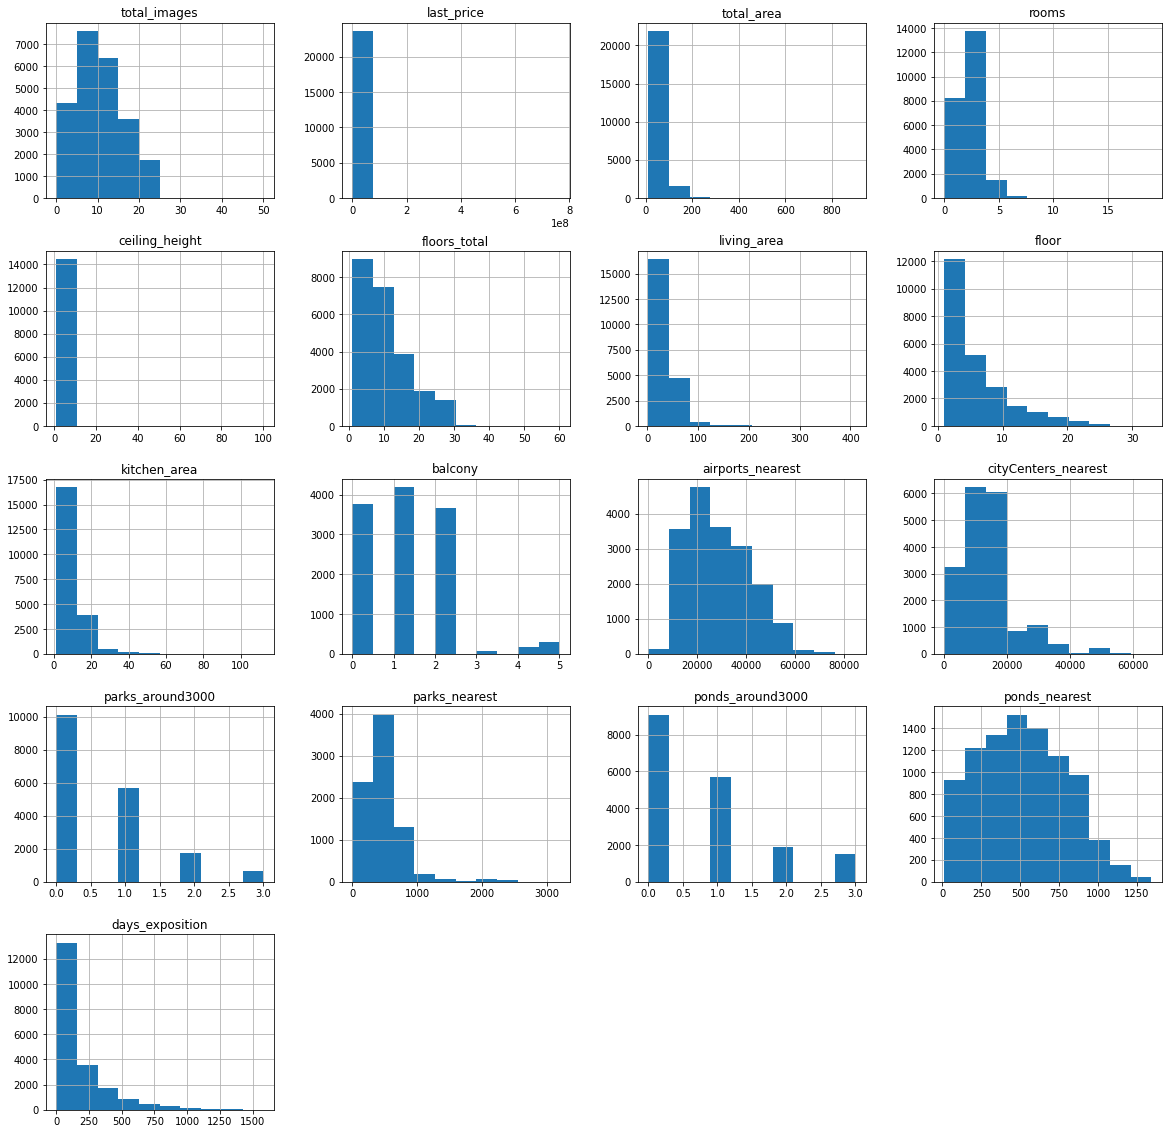

In [4]:
# Построим общую гистограмму для всех числовых столбцов таблицы
data.hist(figsize=(20, 20))

***Вывод:*** Файл содержит 23699 записей. Количество значений в столбцах различается, что говорит о том, что есть пропущенные значения. Присутствуют некорректные типы данных и наименования столбцов. Построена общая гистограмма для всех числовых столбцов таблицы.

### Предобработка данных

In [5]:
# Выведем количество пропущенных значений
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Названия столбцов cityCenters_nearest, parks_around3000, ponds_around3000 написаны не в змеином регистре, исправим это переименовав столбцы

In [6]:
# Переименуем столбцы
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                            'parks_around3000': 'parks_around_3000', 
                            'ponds_around3000': 'ponds_around_3000'
                           })

# Проверим результат
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

***floors_total и locality_name***

Рассмотрим пропущенные значения в столбцах floors_total  и locality_name. Таких значений пропущено меньше всего - 86 и 49 соответственно. Можно предположить, что пропуски в столбце floors_total появились в результате невнимательности при размещении объявления, это человеческий фактор. А вот пропуски в столбце locality_name появились скорее всего в результате технической ошибки. Так как название населенного пункта является обязательным полем при создании объявления и нельзя оставить его пустым.

Таких пропущенных значений очень мало, восстановить название населенного пункта практически невозможно. А заполнять количество этажей в доме средним значением или медианой нецелесообразно. Поэтому просто удалим эти записи.

In [7]:
# Выведем количество пропущеных значений в столбцах floors_total и locality_name
print ('до обработки floors_total', data['floors_total'].isnull().sum())
print ('до обработки locality_name',data['locality_name'].isnull().sum())

# Удалим записи, в котрых отсутствуют данные по количеству этажей и название населенного пункта
data.dropna(subset=['floors_total'], inplace=True)
data.dropna(subset=['locality_name'], inplace=True)

# Проверим результат
print ('после обработки floors_total',data['floors_total'].isnull().sum())
print ('после обработки locality_name',data['locality_name'].isnull().sum())

до обработки floors_total 86
до обработки locality_name 49
после обработки floors_total 0
после обработки locality_name 0


***ceiling_height***

Устраним пропущенные значения в столбце ceiling_height. Скорее всего эти пропуски воникли в результате человеческого фактора. Не все поля объявления являются обязательными для заполнения и эти данные просто не были заполнены.

Заполним пустые значения в столбце медианным значением. Используем именно медианное значение, а не среднее, так как наличие выбросов не сильно повлияет на медиану.

In [8]:
# Выведем количество пропущеных значений в столбце ceiling_height
print('до обработки ceiling_height', data['ceiling_height'].isnull().sum())

# Заполним пустые значения в столбце высота потолков медианным значением
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

# Проверим результат
print('после обработки ceiling_height',data['ceiling_height'].isnull().sum())

до обработки ceiling_height 9084
после обработки ceiling_height 0


***living_area***

Предположим, что в квартирах со свободной планировкой не указана жилая площадь, а указана только общая площадь.

In [9]:
# Выведем количество пропущеных значений в столбце living_area
print('до обработки living_area', data['living_area'].isnull().sum())

# В квартирах со свободной планировкой заменим пустые значения на 0
data.loc[data['open_plan'] == True, 'living_area'] = 0

# Проверим результат
print('после первой обработки living_area', data['living_area'].isnull().sum())

до обработки living_area 1865
после первой обработки living_area 1860


Да, такие записи действительно есть, но их очень мало - 5. Значит, данные пропущены по другой причине, скорее всего это спешка или невнимательность.

In [10]:
# Заполним пропуски медианным значением по категориям
data['living_area'].fillna(data.groupby(['floors_total'])['living_area'].transform('median'), inplace=True)

# Проверим результат
print('после второй обработки living_area', data['living_area'].isnull().sum())

после второй обработки living_area 0


***kitchen_area***

Предположим, что в студиях не указана площадь кухни и пропуски в столбце kitchen_area появились именно по этой причине.

In [11]:
# Выведем количество пропущеных значений в столбце kitchen_area
print('до обработки kitchen_area', data['kitchen_area'].isnull().sum())

# В студиях заменим пустые значения на 0
data.loc[data['studio'] == True, 'kitchen_area'] = 0

# Проверим результат
print('после первой обработки kitchen_area', data['kitchen_area'].isnull().sum())

до обработки kitchen_area 2222
после первой обработки kitchen_area 2076


Да, такие записи есть, но их не так много - 146.
Остальные пропуски могут быть квартирами со свободной планировкой, проверим это.

In [12]:
# В квартирах со свободной планировкой заменим пустые значения на 0
data.loc[data['open_plan'] == True, 'kitchen_area'] = 0

# Проверим результат
print('после второй обработки kitchen_area', data['kitchen_area'].isnull().sum())

после второй обработки kitchen_area 2009


Да, такие записи действительно есть, но их очень мало - 67. Значит, остальные значения пропущены по другой причине, скорее всего это спешка и невнимательность при заполнении. Указали общую площадь, а площадь кухни не указали.

In [13]:
# Заполним пропуски медианным значением по категориям.
data['kitchen_area'].fillna(data.groupby(['floors_total'])['kitchen_area'].transform('median'), inplace=True)

# Проверим результат
print('после третьей обработки kitchen_area', data['kitchen_area'].isnull().sum())

после третьей обработки kitchen_area 1


In [14]:
data.dropna(subset=['kitchen_area'], inplace=True)

# Проверим результат
print('после четвертой обработки kitchen_area', data['kitchen_area'].isnull().sum())

после четвертой обработки kitchen_area 0


***is_apartment***

Предположим, что значения в столбце апартаменты указали только те, кто точно знает, что продает апартаменты.

In [15]:
# Выведем количество пропущеных значений в столбце is_apartment
print('до обработки is_apartment', data['is_apartment'].isnull().sum())

# Заполним недостающие значения для апартаментов
data['is_apartment'] = data['is_apartment'].fillna(False)

print('после обработки is_apartment', data['is_apartment'].isnull().sum())

до обработки is_apartment 20804
после обработки is_apartment 0


***balcony***

Предположим, что значения в столбце балконы указали только те, у кого они есть.

In [16]:
# Выведем количество пропущеных значений в столбце is_apartment
print('до обработки balcony', data['balcony'].isnull().sum())

# Заполним недостающие значения для балконов
data['balcony'] = data['balcony'].fillna(0)

# Проверим результат
print('после обработки balcony', data['balcony'].isnull().sum())

до обработки balcony 11474
после обработки balcony 0


```python

columns = [col1, col2, col3]

for i in columns:
    df[i] = df[i].fillna(0)

```

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23564 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23564 non-null  int64  
 1   last_price            23564 non-null  float64
 2   total_area            23564 non-null  float64
 3   first_day_exposition  23564 non-null  object 
 4   rooms                 23564 non-null  int64  
 5   ceiling_height        23564 non-null  float64
 6   floors_total          23564 non-null  float64
 7   living_area           23564 non-null  float64
 8   floor                 23564 non-null  int64  
 9   is_apartment          23564 non-null  bool   
 10  studio                23564 non-null  bool   
 11  open_plan             23564 non-null  bool   
 12  kitchen_area          23564 non-null  float64
 13  balcony               23564 non-null  float64
 14  locality_name         23564 non-null  object 
 15  airports_nearest   

Изменим некоторые типы данных:

* В столбце last_price изменим тип на int, для удобства работы с данными.

* В столбце first_day_exposition изменим тип на datetime, для удобства работы с данными.

* В столбце floors_total изменим тип на int, количество этажей это целое число.

* В столбце balcony изменим тип на int, количество балконов это целое число.

In [18]:
# Изменим типы данных
data['last_price'] = data['last_price'].astype('int')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23564 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23564 non-null  int64         
 1   last_price            23564 non-null  int64         
 2   total_area            23564 non-null  float64       
 3   first_day_exposition  23564 non-null  datetime64[ns]
 4   rooms                 23564 non-null  int64         
 5   ceiling_height        23564 non-null  float64       
 6   floors_total          23564 non-null  int64         
 7   living_area           23564 non-null  float64       
 8   floor                 23564 non-null  int64         
 9   is_apartment          23564 non-null  bool          
 10  studio                23564 non-null  bool          
 11  open_plan             23564 non-null  bool          
 12  kitchen_area          23564 non-null  float64       
 13  balcony         

In [19]:
# Проверим наличие явных дубликатов
data.duplicated().sum()

0

In [20]:
# Посмотрим на количество значений в столбце locality_name
data['locality_name'].value_counts()

Санкт-Петербург            15650
посёлок Мурино               520
посёлок Шушары               439
Всеволожск                   398
Пушкин                       369
                           ...  
деревня Большое Рейзино        1
деревня Мануйлово              1
деревня Тойворово              1
деревня Пижма                  1
поселок Володарское            1
Name: locality_name, Length: 364, dtype: int64

In [21]:
# И на сами значения в столбце locality_name
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [22]:
# Устраним дубликаты в столбце locality_name
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок станции', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок')

data['locality_name'].value_counts()

Санкт-Петербург               15650
поселок Мурино                  552
поселок Шушары                  439
Всеволожск                      398
Пушкин                          369
                              ...  
деревня Каськово                  1
садовое товарищество Рахья        1
деревня Русско                    1
село Никольское                   1
поселок Володарское               1
Name: locality_name, Length: 319, dtype: int64

***Вывод:*** Предобработка данных завершена, датасет содержит 23564 записи. Удалены некорректные записи, недостающая информация восстановлена по существующим данным из других параметров. В столбцах с картографическими данными информация оставлена как есть. Изменены типы данных столбцов last_price, first_day_exposition, floors_total, balcony. Устранены неявные дубликаты в названиях населенных пунктов.

### Посчитайте и добавьте в таблицу новые столбцы

In [23]:
# Добавим в таблицу цену одного квадратного метра
data['price_meter'] = data['last_price'] / data['total_area']

In [24]:
# Добавим в таблицу день недели, месяц и год публикации объявления
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

In [25]:
# Функция для определения дня недели
def days_category(row):
    day = row['weekday_exposition']
    if day == 0:
        return 'понедельник'
    elif day == 1:
        return 'вторник'
    elif day == 2:
        return 'среда'
    elif day == 3:
        return 'четверг'
    elif day == 4:
        return 'пятница'
    elif day == 5:
        return 'суббота'
    elif day == 6:
        return 'воскресенье'

In [26]:
# Добавим в таблицу категорию дня недели
data['weekday_exposition'] = data.apply(days_category, axis = 1)

In [27]:
# Функция для разделения этажей по категориям
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

In [28]:
# Добавим в таблицу категорию этажа
data['floor_category'] = data.apply(floor_category, axis = 1)

In [29]:
# Расстояние до центра города в километрах
data['city_centers_km'] = (data['city_centers_nearest'] / 1000).round() 

In [30]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_meter,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,четверг,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,вторник,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,четверг,8,2015,другой,14.0
3,0,64900000,159.00,2015-07-24,3,2.65,14,26.60,9,False,False,False,9.00,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,пятница,7,2015,другой,7.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,вторник,6,2018,другой,8.0
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,понедельник,9,2018,другой,NaN
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456,четверг,11,2017,другой,19.0
7,5,7915000,71.60,2019-04-18,2,2.65,24,19.50,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737,четверг,4,2019,другой,12.0
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.764777,среда,5,2018,другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164,воскресенье,2,2017,другой,15.0


***Вывод:*** В таблицу добавлены новые столбцы:

* цена одного квадратного метра

* день недели, месяц и год публикации объявления

* категория этажа

* расстояние до центра города в километрах

Написана функция для определения дня недели и функция для разделения этажей по категориям.

### Проведите исследовательский анализ данных

***Общая площадь***

count    23564.000000
mean        60.324196
std         35.657194
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


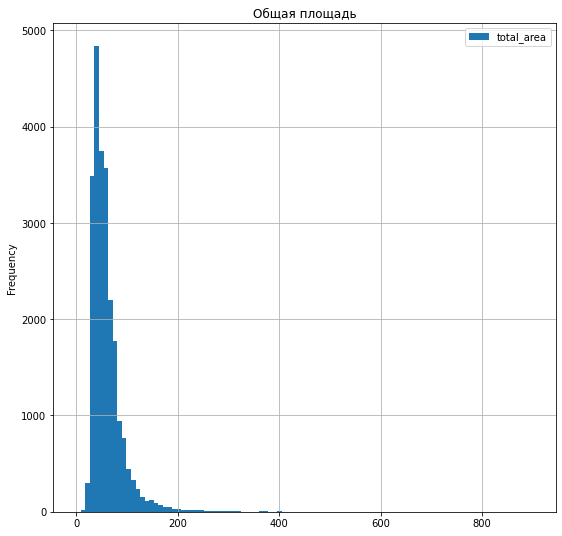

In [31]:
# Проанализируем столбец total_area и построим гистограмму
print(data['total_area'].describe())
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (9,9), range = (0,900))
plt.title('Общая площадь')
plt.show()

Общая площадь недвижимости составляет от 12 квадратных метров до 900 квадратных метров.

Самая продаваемая недвижимость на рынке с общей площадью от 42 до 45 квадратных метров. Эти значения соответствуют жилой площади 1-комнатной квариры.

***Жилая площадь***

count    23564.000000
mean        33.983555
std         21.312195
min          0.000000
25%         19.000000
50%         30.000000
75%         41.300000
max        409.700000
Name: living_area, dtype: float64


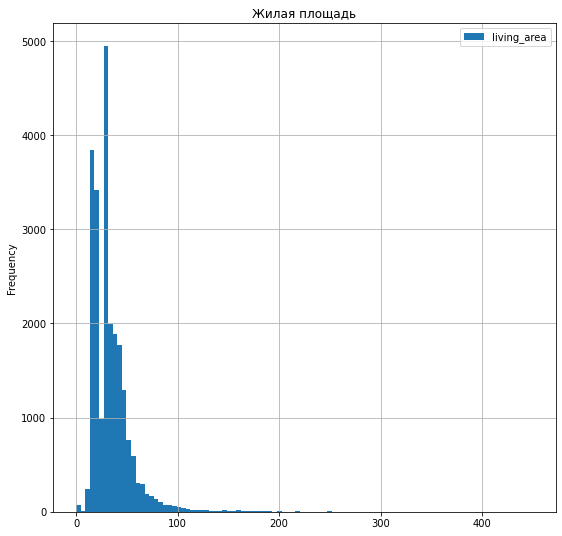

In [32]:
# Проанализируем столбец living_area и построим гистограмму
print(data['living_area'].describe())
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (9,9), range = (0,450))
plt.title('Жилая площадь')
plt.show()

Жилая площадь недвижимости составляет от 19 квадратных метров до 409 квадратных метров.

Самая продаваемая недвижимость на рынке с жилой площадью от 17 до 30 квадратных метров. Эти значения соответствуют жилой площади 1-комнатной квариры.

Также стоит отметить, что есть квартиры со свободной планировкой, для которых указана только общая площадь, а жилая площадь равна 0.

***Площадь кухни***

count    23564.000000
mean        10.351090
std          5.737732
min          0.000000
25%          7.000000
50%          9.100000
75%         11.500000
max        112.000000
Name: kitchen_area, dtype: float64


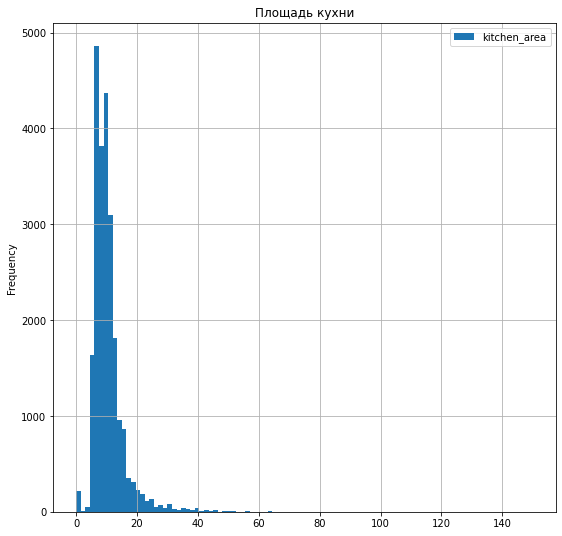

In [33]:
# Проанализируем столбец kitchen_area и построим гистограмму
print(data['kitchen_area'].describe())
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (9,9), range = (0,150))
plt.title('Площадь кухни')
plt.show()

Площадь кухни составляет от 7 квадратных метров до 112 квадратных метров.

Самая продаваемая недвижимость на рынке с площадью кухни от 9 до 11 квадратных метров.

Также стоит отметить, что есть квартиры со свободной планировкой и квартиры-студии, для которых указана только общая площадь, а площадь кухни равна 0.

***Цена объекта***

count    2.356400e+04
mean     6.540185e+06
std      1.091115e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646500e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64


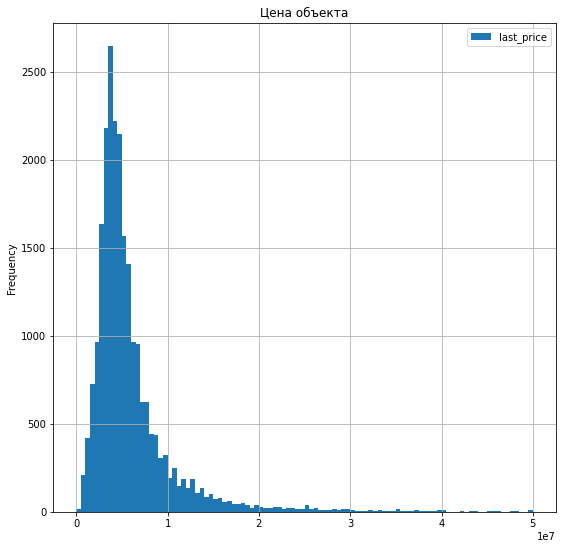

In [34]:
# Проанализируем столбец last_price и построим гистограмму
print(data['last_price'].describe())
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (9,9), range = (0,50000000))
plt.title('Цена объекта')
plt.show()

In [35]:
# В данных есть выбросы, минимальная цена квартиры 12190 рублей
data[data['last_price'] < 15000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_meter,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_km
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,111.834862,среда,3,2019,последний,9.0


In [36]:
# Квартира в Санкт-Петербурге площадью 109 квадратных метров, на 25 этаже, в 9 километрах от центра не может стоить 12190
data['last_price'] = data['last_price'].replace(12190, 12190000)

# Проверим
print(data['last_price'].describe())

count    2.356400e+04
mean     6.540702e+06
std      1.091113e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.648500e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64


Стоймость недвижимости варьируется от 430 тысяч рублей до 763 миллионов рублей.

Средняя стоймость объекта недвижимости - 6,5 миллионов рублей.

***Количество комнат***

count    23564.000000
mean         2.070701
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


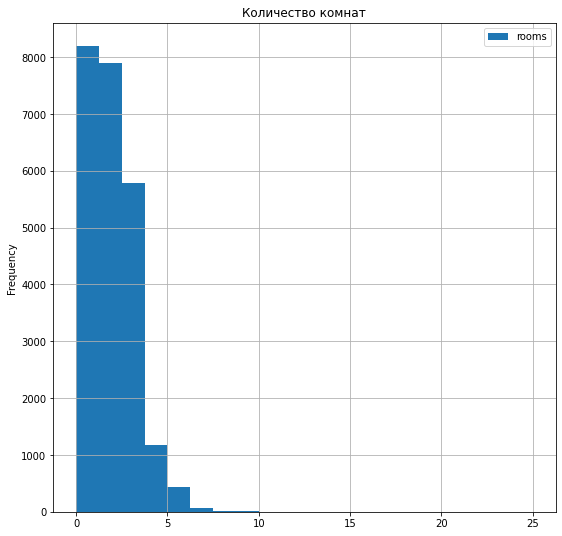

In [37]:
# Проанализируем столбец rooms и построим гистограмму
print(data['rooms'].describe())
data.plot(y = 'rooms', kind = 'hist', bins = 20, grid=True, figsize = (9,9), range = (0,25))
plt.title('Количество комнат')
plt.show()

In [38]:
# Посмотрим на значения
print(data['rooms'].value_counts())

1     8003
2     7897
3     5779
4     1172
5      325
0      194
6      104
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64


Стоит отметить, что есть 194 обяъвления, в которых количество комнат равно нулю.

In [39]:
# 135 из них являются студиями, в студии одна комната, поэтому проставим 1.
data.loc[(data['rooms'] == 0) & (data['studio'] == True), 'rooms'] = 1
print(data['rooms'].value_counts())

1     8138
2     7897
3     5779
4     1172
5      325
6      104
7       59
0       59
8       12
9        8
10       3
11       2
14       2
16       1
19       1
12       1
15       1
Name: rooms, dtype: int64


In [40]:
# Остальные 59 являются квартирами со свободной планировкой, их не трогаем
data['rooms'].loc[(data['rooms'] == 0) & (data['open_plan'] == True)].count()

59

На рынке недвижимости наиболее распространены 1-комнатные квартиры - 8138 объявлений,
чуть меньше по количеству 2-комнатных квартир - 7897 обяъвлений, 3-комнатныx - 5779.

Также стоит отметить, что есть 59 объектов недвижимости со свободной планировкой, у этих объектов число комнат равно 0.

***Высота потолков***

count    23564.000000
mean         2.724533
std          0.991047
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


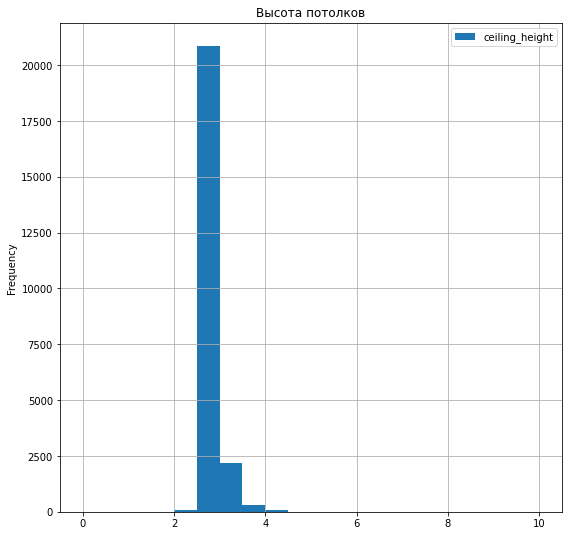

In [41]:
# Проанализируем столбец ceiling_height и построим гистограмму
print(data['ceiling_height'].describe())
data.plot(y = 'ceiling_height', kind = 'hist', bins = 20, grid=True, figsize = (9,9), range = (0,10))
plt.title('Высота потолков')
plt.show()

In [42]:
# Подправим, чтобы не было потолков ниже 2.3 метра
data.loc[data['ceiling_height'] < 2.3, 'ceiling_height'] = 2.3
# Проверим
print(data['ceiling_height'].describe())
data.loc[data['ceiling_height'] > 10]

count    23564.000000
mean         2.724805
std          0.990840
min          2.300000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_meter,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_km
355,17,3600000,55.2,2018-07-12,2,25.0,5,32.0,2,False,False,False,7.0,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0,65217.391304,четверг,7,2018,другой,NaN
3148,14,2900000,75.0,2018-11-12,3,32.0,3,53.0,2,False,False,False,8.0,0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38666.666667,понедельник,11,2018,другой,NaN
4643,0,4300000,45.0,2018-02-01,2,25.0,9,30.0,2,False,False,False,7.0,1,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0,95555.555556,четверг,2,2018,другой,13.0
4876,7,3000000,25.0,2017-09-27,0,27.0,25,0.0,17,False,False,True,0.0,2,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0,120000.000000,среда,9,2017,другой,NaN
5076,0,3850000,30.5,2018-10-03,1,24.0,5,19.5,1,True,False,False,5.5,0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0,126229.508197,среда,10,2018,первый,8.0
5246,0,2500000,54.0,2017-10-13,2,27.0,5,30.0,3,False,False,False,9.0,2,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0,46296.296296,пятница,10,2017,другой,NaN
5669,4,4400000,50.0,2017-08-08,2,26.0,9,21.3,3,False,False,False,7.0,2,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0,88000.000000,вторник,8,2017,другой,11.0
5807,17,8150000,80.0,2019-01-09,2,27.0,36,41.0,13,False,False,False,12.0,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0,101875.000000,среда,1,2019,другой,20.0
6246,6,3300000,44.4,2019-03-25,2,25.0,5,31.3,5,False,False,False,5.7,0,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN,74324.324324,понедельник,3,2019,последний,51.0
9379,5,3950000,42.0,2017-03-26,3,25.0,5,30.0,2,False,False,False,5.2,0,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN,94047.619048,воскресенье,3,2017,другой,14.0


In [43]:
data['ceiling_height'] = data['ceiling_height'].replace(100.0, 5.0)

In [44]:
# Разделим на 10 потолки выше 10 метров, предположим, что это опечатка в результате невнимательности
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data['ceiling_height'] / 10
print(data['ceiling_height'].describe())

count    23564.00000
mean         2.69788
std          0.23284
min          1.03000
25%          2.60000
50%          2.65000
75%          2.70000
max          8.30000
Name: ceiling_height, dtype: float64


Средняя высота потолков - 2,7 метра, хотя встречаются объекты с более высокими потолками до 5 метров

***Этаж квартиры***

count    23564.000000
mean         5.877398
std          4.870311
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


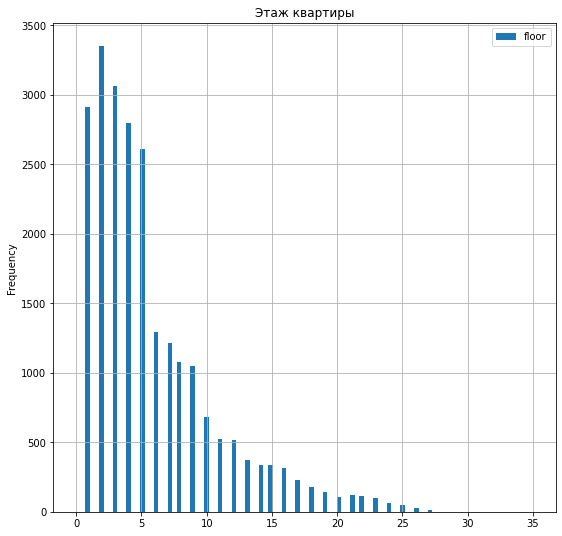

In [45]:
# Проанализируем столбец floor и построим гистограмму
print(data['floor'].describe())
data.plot(y = 'floor', kind = 'hist', bins = 100, grid=True, figsize = (9,9), range = (0,35))
plt.title('Этаж квартиры')
plt.show()

Преобладает недвижимость на втором, третьем и первом этажах.

***Тип этажа квартиры***

count      23564
unique         3
top       другой
freq       17325
Name: floor_category, dtype: object


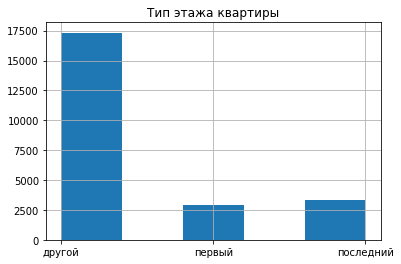

In [46]:
# Проанализируем столбец floor_category и построим гистограмму
print(data['floor_category'].describe())
data['floor_category'].hist(bins=5)
plt.title('Тип этажа квартиры')
plt.show()

Большая часть объявлений - недвижимость не на первых и последних этажах.

Объявлений о продаже недвижимости на последнем этаже немного больше, чем на первом этаже.

***Количество этажей в доме***

count    23564.000000
mean        10.674885
std          6.593213
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


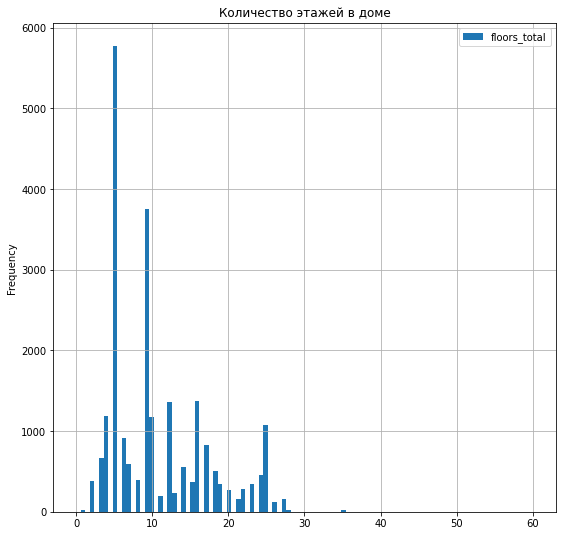

In [47]:
# Проанализируем столбец floors_total и построим гистограмму
print(data['floors_total'].describe())
data.plot(y = 'floors_total', kind = 'hist', bins = 100, grid=True, figsize = (9,9), range = (0,60))
plt.title('Количество этажей в доме')
plt.show()

На рынке недвижимости представлены здания практически любой этажности от 1 этажных до 60 этажных, но преобладают 5 и 9 этажные здания.

***Расстояние до центра города в метрах***

count    18063.000000
mean     14192.309971
std       8613.460987
min        181.000000
25%       9238.000000
50%      13095.000000
75%      16285.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64


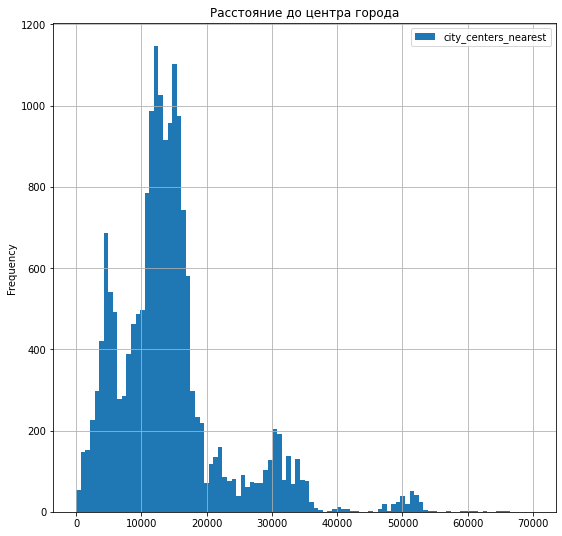

In [48]:
# Проанализируем столбец city_centers_nearest и построим гистограмму
print(data['city_centers_nearest'].describe())
data.plot(y = 'city_centers_nearest', kind = 'hist', bins = 100, grid=True, figsize = (9,9), range = (0,70000))
plt.title('Расстояние до центра города')
plt.show()

На гистограмме можно увидеть три пика, что говорит о наличии крупных районов на этом удалении от центра.

Большая часть недвижимости расположена на расстоянии 12000-17000 метров от центра.

***Расстояние до ближайшего аэропорта***

count    18040.000000
mean     28797.640632
std      12632.627585
min          0.000000
25%      18563.000000
50%      26757.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64


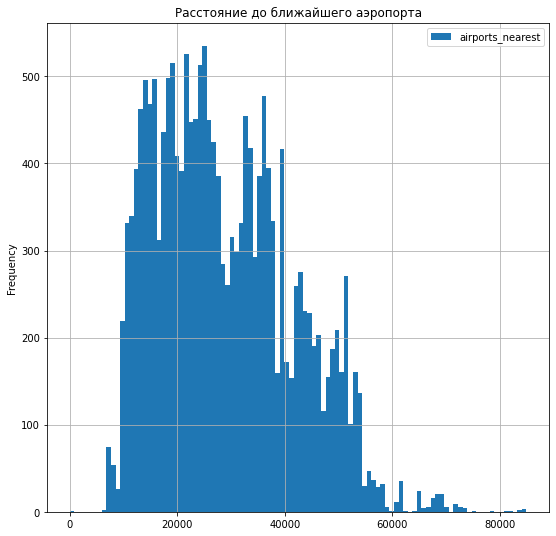

In [49]:
# Проанализируем столбец airports_nearest и построим гистограмму
print(data['airports_nearest'].describe())
data.plot(y = 'airports_nearest', kind = 'hist', bins = 100, grid=True, figsize = (9,9), range = (0,85000))
plt.title('Расстояние до ближайшего аэропорта')
plt.show()

Среднее расстояние до аэропорта составляет 28000 метров.

***Расстояние до ближайшего парка***

count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


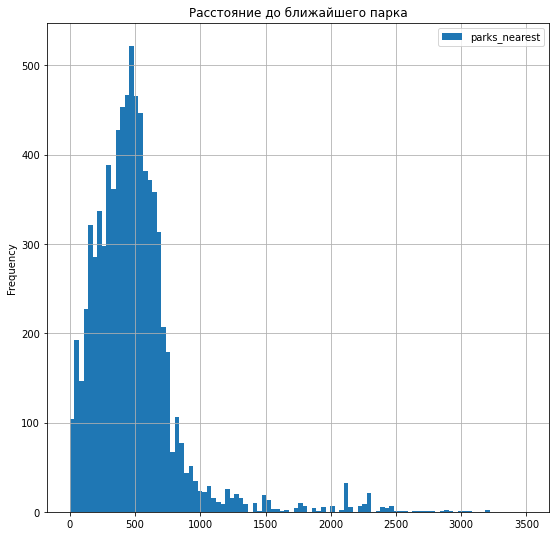

In [50]:
# Проанализируем столбец parks_nearest и построим гистограмму
print(data['parks_nearest'].describe())
data.plot(y = 'parks_nearest', kind = 'hist', bins = 100, grid=True, figsize = (9,9), range = (0,3500))
plt.title('Расстояние до ближайшего парка')
plt.show()

Среднее расстояние до парка составляет 490 метров.

 ***День и месяц публикации объявления***

count       23564
unique          7
top       четверг
freq         4275
Name: weekday_exposition, dtype: object


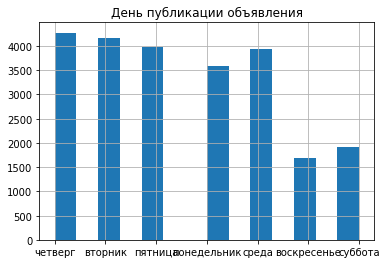

In [51]:
# Проанализируем столбец weekday_exposition и построим гистограмму
print(data['weekday_exposition'].describe())
data['weekday_exposition'].hist(bins=14)
plt.title('День публикации объявления')
plt.show()

count    23564.000000
mean         6.401757
std          3.492904
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64


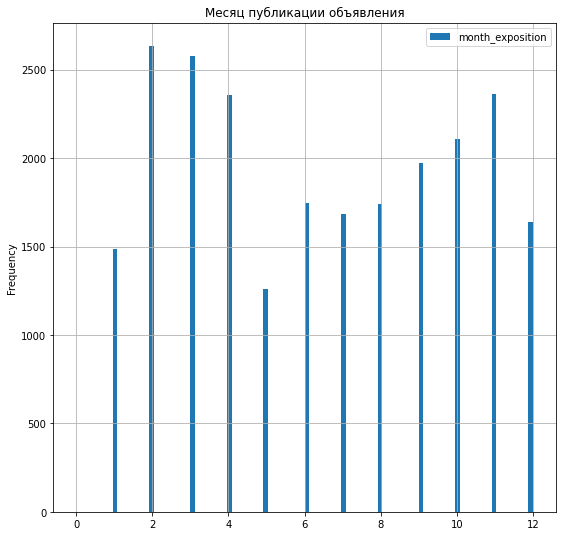

In [52]:
# Проанализируем столбец month_exposition и построим гистограмму
print(data['month_exposition'].describe())
data.plot(y = 'month_exposition', kind = 'hist', bins = 100, grid=True, figsize = (9,9), range = (0,12))
plt.title('Месяц публикации объявления')
plt.show()

На гистограмме можно увидеть два пика, первый начинается с февраля и идет на спад к маю. Это связано с тем, что с мая начинается сезон отпусков и продажи недвижимости снижаются.

Второй пик начинается с сентября и идет на спад к декабрю. Это связано с тем, что сезон отпусков заканчивается и продажи недвижимости возрастают до новогодних праздников.

***Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление***

count    20393.000000
mean       180.730153
std        219.732305
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


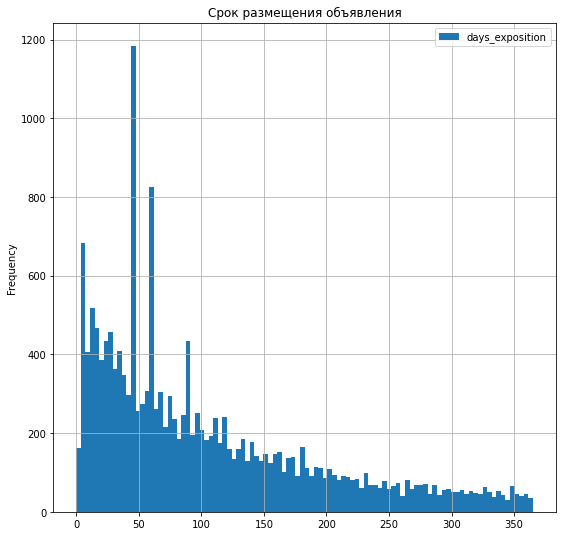

In [53]:
# Проанализируем столбец month_exposition и построим гистограмму
print(data['days_exposition'].describe())
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (9,9), range = (0,365))
plt.title('Срок размещения объявления')
plt.show()

В среднем квартира продается 180 дней, большинство квартир продается гораздо быстрее. Есть квартиры, которые продаются больше года, скорее всего они имеют какие то проблемы.

На гистограмме можно увидеть 4 пика - 7, 45, 60, 90 дней. Это связано особенностями размещения объявлений и правилами сервиса.


***Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы***

0.6536891965461195


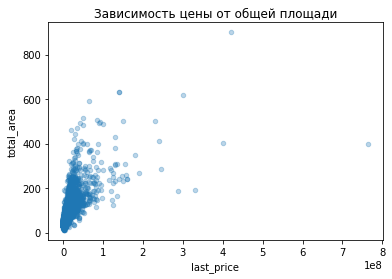

0.5401906340483386


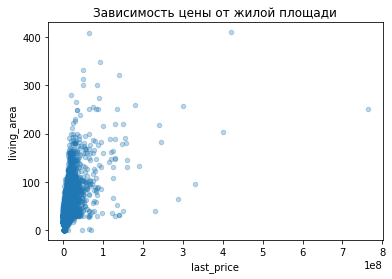

0.44053236434056253


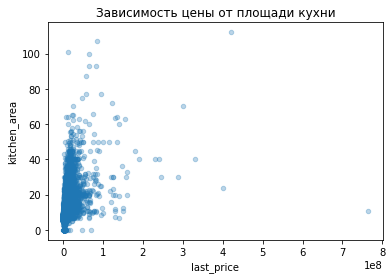

In [54]:
# Зависимость цены от площади
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3)
print(data['last_price'].corr(data['total_area']))
plt.title('Зависимость цены от общей площади')
plt.show()

data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.3)
print(data['last_price'].corr(data['living_area']))
plt.title('Зависимость цены от жилой площади')
plt.show()

data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.3)
print(data['last_price'].corr(data['kitchen_area']))
plt.title('Зависимость цены от площади кухни')
plt.show()

Прослеживается зависимость цены от площади, чем больше площадь, тем больше цена.

По коэффициенту корреляции можно сделать вывод о том, что общая площадь влияет на цену сильнее, чем жилая площадь и площадь кухни.

0.3643427226919201


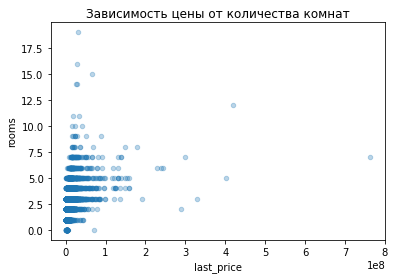

In [55]:
# Зависимость цены от количества комнат
data.plot(x='last_price', y='rooms', kind='scatter', alpha=0.3)
print(data['last_price'].corr(data['rooms']))
plt.title('Зависимость цены от количества комнат')
plt.show()

Можно сделать вывод о том, что количество комнат влияет на цену, но в диапазоне от 1 да 3 комнат.

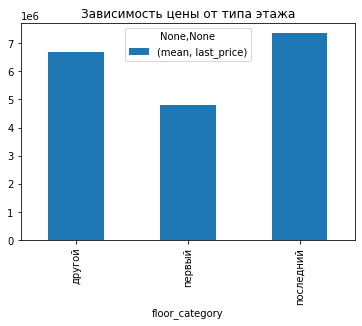

In [56]:
# Зависимость цены от типа этажа
data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean']).plot(kind = 'bar')
plt.title('Зависимость цены от типа этажа')
plt.show()

Прослеживается зависимость цены от типа этажа. В среднем, самая высокая стоймость жилья на последних этажах, связано это с тем что элитная недвижимость часто расположена именно нав последних этажах. Далее идет средняя стоймость недвижимости на других этажах. И самая низкая средняя стоимость недвижимости на первых этажах.

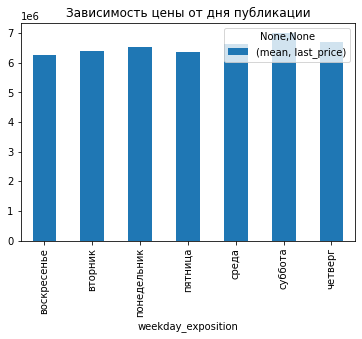

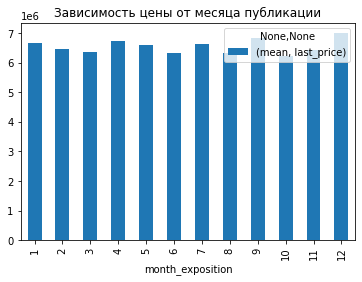

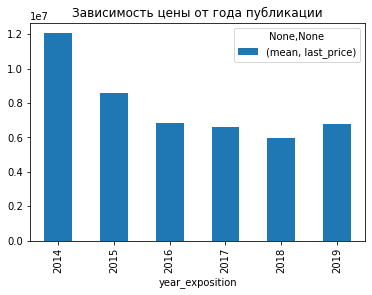

In [57]:
# Зависимость цены от даты публикации
data.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = ['mean']).plot(kind='bar')
plt.title('Зависимость цены от дня публикации')
plt.show()

data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean']).plot(kind='bar')
plt.title('Зависимость цены от месяца публикации')
plt.show()

data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean']).plot(kind='bar')
plt.title('Зависимость цены от года публикации')
plt.show()

***Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name***

In [58]:
data.groupby('locality_name')['price_meter'].agg(['mean', 'count']).sort_values(by='count', ascending=False).head(10)

,mean,count
locality_name,,
Санкт-Петербург,114868.115882,15650
поселок Мурино,85629.568678,552
поселок Шушары,78551.344545,439
Всеволожск,68654.473986,398
Пушкин,103125.819291,369
Колпино,75424.579098,338
поселок Парголово,90175.913458,327
Гатчина,68746.146763,307
деревня Кудрово,92473.547576,299


Самая высокая стоймость недвижимости зафиксирована в Санкт-Петербурге - 114868 рублей за квадратный метр.

Самая низкая стоймость недвижимости зафиксирована в Выборге - 58141 рублей за квадратный метр.

***Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города***

In [59]:
# Вычислим среднюю цену каждого километра
data.pivot_table(index='city_centers_km', values='price_meter', aggfunc='mean')

,price_meter
city_centers_km,
0.0,245833.530289
1.0,177005.407676
2.0,157849.007329
3.0,121507.831586
4.0,133282.874761
...,...
61.0,60606.060606
62.0,69114.470842
63.0,62500.000000


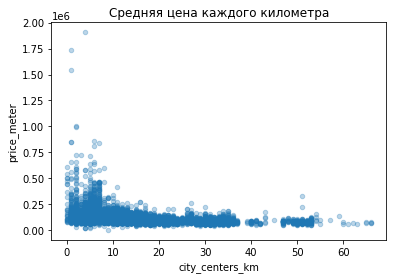

In [60]:
data.plot(x='city_centers_km', y='price_meter', kind='scatter', alpha=0.3)
plt.title('Средняя цена каждого километра')
plt.show()

С удаление от центра стоймость недвижимости уменьшается от 245833 рублей за квадратный метр до 73551 рублей за квадратный метр.

***Вывод:*** В результате проведения исследовательского анализа данных, удалось выяснить следующее:

* Общая площадь составляет от 12 квадратных метров до 900 квадратных метров.
* Жилая площадь составляет от 19 квадратных метров до 409 квадратных метров.
* Площадь кухни составляет от 7 квадратных метров до 112 квадратных метров.

Самая продаваемая недвижимость на рынке имеет:

* Общей площадь от 42 до 45 квадратных метров.
* Жилую площадь от 17 до 30 квадратных метров.
* Площадь кухни от 9 до 11 квадратных метров.

Эти значения соответствуют площади 1-комнатной квариры.

Также стоит отметить, что  среди объектов недвижимости есть:

* Квартиры со свободной планировкой, для которых указана только общая площадь, а жилая площадь равна 0.
* Квартиры со свободной планировкой и квартиры-студии, для которых указана только общая площадь, а площадь кухни равна 0.

Стоймость недвижимости варьируется от 430 тысяч рублей до 763 миллионов рублей. Средняя стоймость объекта недвижимости - 6,5 миллионов рублей. 

Наиболее распространены:

* 1-комнатные квартиры - 8138 объявлений
* 2-комнатные квартиры - 7897 обяъвлений
* 3-комнатные квартиры - 5779 обяъвлений

Также стоит отметить, что есть 59 объектов недвижимости со свободной планировкой, у этих объектов число комнат равно 0.

Средняя высота потолков - 2,7 метра, хотя встречаются объекты с более высокими потолками до 10 метров.

* Преобладает недвижимость на втором, третьем и первом этажах. 
* Большая часть объявлений - недвижимость не на первых и не на последних этажах.
* Объявлений о продаже недвижимости на последнем этаже немного больше, чем на первом этаже.

На рынке недвижимости представлены здания практически любой этажности от 1 этажных до 60 этажных, но, преобладают 5 и 9 этажные здания.

* Большая часть недвижимости находится на удалении 12000-17000 метров от центра.
* Среднее расстояние до аэропорта составляет 28000 метров.
* Среднее расстояние до парка составляет 490 метров.

На гистограмме можно увидеть два пика, первый начинается с февраля и идет на спад к маю. Это связано с тем, что с мая начинается сезон отпусков и продажи недвижимости снижаются.

Второй пик начинается с сентября и идет на спад к декабрю. Это связано с тем, что сезон отпусков заканчивается и продажи недвижимости возрастают до новогодних праздников.

В среднем квартира продается 180 дней, большинство квартир продается гораздо быстрее. Есть квартиры, которые продаются больше года, скорее всего они имеют какие то проблемы.

* Самая высокая стоймость недвижимости зафиксирована в Санкт-Петербурге - 114868 рублей за квадратный метр.
* Самая низкая стоймость недвижимости зафиксирована в Выборге - 58141 рублей за квадратный метр.

С удаление от центра стоймость недвижимости уменьшается от 245833 рублей за квадратный метр до 73551 рублей за квадратный метр.


### Общий вывод

Файл содержит 23699 записей. Количество значений в столбцах различается, что говорит о том, что есть пропущенные значения. Присутствуют некорректные типы данных и наименования столбцов. Построена общая гистограмма для всех числовых столбцов таблицы.

Предобработка данных завершена, датасет содержит 23564 записи. Удалены некорректные записи, недостающая информация восстановлена по существующим данным из других параметров. В столбцах с картографическими данными информация оставлена как есть. Изменены типы данных столбцов last_price, first_day_exposition, floors_total, balcony. Устранены неявные дубликаты в названиях населенных пунктов.

В таблицу добавлены новые столбцы:

* цена одного квадратного метра

* день недели, месяц и год публикации объявления

* категория этажа

* расстояние до центра города в километрах

Написана функция для определения дня недели и функция для разделения этажей по категориям.

В результате проведения исследовательского анализа данных, удалось выяснить следующее:

    Общая площадь составляет от 12 квадратных метров до 900 квадратных метров.
    Жилая площадь составляет от 19 квадратных метров до 409 квадратных метров.
    Площадь кухни составляет от 7 квадратных метров до 112 квадратных метров.

Самая продаваемая недвижимость на рынке имеет:

    Общей площадь от 42 до 45 квадратных метров.
    Жилую площадь от 17 до 30 квадратных метров.
    Площадь кухни от 9 до 11 квадратных метров.

Эти значения соответствуют площади 1-комнатной квариры.

Также стоит отметить, что среди объектов недвижимости есть:

    Квартиры со свободной планировкой, для которых указана только общая площадь, а жилая площадь равна 0.
    Квартиры со свободной планировкой и квартиры-студии, для которых указана только общая площадь, а площадь кухни равна 0.

Стоймость недвижимости варьируется от 430 тысяч рублей до 763 миллионов рублей. Средняя стоймость объекта недвижимости - 6,5 миллионов рублей.

Наиболее распространены:

    1-комнатные квартиры - 8138 объявлений
    2-комнатные квартиры - 7897 обяъвлений
    3-комнатные квартиры - 5779 обяъвлений

Также стоит отметить, что есть 59 объектов недвижимости со свободной планировкой, у этих объектов число комнат равно 0.

Средняя высота потолков - 2,7 метра, хотя встречаются объекты с более высокими потолками до 5 метров.

    Преобладает недвижимость на втором, третьем и первом этажах.
    Большая часть объявлений - недвижимость не на первых и не на последних этажах.
    Объявлений о продаже недвижимости на последнем этаже немного больше, чем на первом этаже.

На рынке недвижимости представлены здания практически любой этажности от 1 этажных до 60 этажных, но, преобладают 5 и 9 этажные здания.

    Большая часть недвижимости находится на удалении 12000-17000 метров от центра.
    Среднее расстояние до аэропорта составляет 28000 метров.
    Среднее расстояние до парка составляет 490 метров.

На гистограмме можно увидеть два пика, первый начинается с февраля и идет на спад к маю. Это связано с тем, что с мая начинается сезон отпусков и продажи недвижимости снижаются.

Второй пик начинается с сентября и идет на спад к декабрю. Это связано с тем, что сезон отпусков заканчивается и продажи недвижимости возрастают до новогодних праздников.

В среднем квартира продается 180 дней, большинство квартир продается гораздо быстрее. Есть квартиры, которые продаются больше года, скорее всего они имеют какие то проблемы.

    Самая высокая стоймость недвижимости зафиксирована в Санкт-Петербурге - 114868 рублей за квадратный метр.
    Самая низкая стоймость недвижимости зафиксирована в Выборге - 58141 рублей за квадратный метр.

С удаление от центра стоймость недвижимости уменьшается от 245833 рублей за квадратный метр до 73551 рублей за квадратный метр.